In [1]:
import numpy as np
import pandas as pd
from knockai.log_decode import log_decode
from matplotlib import pyplot as plt


In [2]:
df = log_decode('/Users/danchecketts/dev/learning/Knockai/resources/runs/r02/r2-100k-af.txt')
df.head()

,Secs,RPM,MAP,ETemp,IAT,VOLTS,TPS,OXY,WB_Oxy,INJ_PW,...,Accel_,RadFan,Aux1,Aux1,Orun_Vac,Iat_Rtd,Stagin,IDLEST,TPSCls,Markers
0,0.00,900,32,74,18,13.0,20,0.12,15.1,1.6,...,Off,Off,Off,Off,Off,Off,Off,=,Closed,I
1,0.09,900,32,74,16,13.0,20,0.12,14.7,1.6,...,Off,Off,Off,Off,Off,Off,Off,=,Closed,I
2,0.17,800,32,74,16,12.9,20,0.12,13.9,1.6,...,Off,Off,Off,Off,Off,Off,Off,=,Closed,I
3,0.27,800,32,74,16,12.9,20,0.95,13.8,1.6,...,Off,Off,Off,Off,Off,Off,Off,=,Closed,I
4,0.36,800,33,74,16,12.7,20,0.91,14.0,1.7,...,Off,Off,Off,Off,Off,Off,Off,=,Closed,I


In [9]:
# Clean the data, remove INJ_PW values less than 1.7 as this can be over-run vac and "should be over-run vac but hasn't got there"
df = df[df["INJ_PW"] > 1.7]

In [12]:
# Remove WB_Oxy values greater than 15 as these are likely injector shut-off
df = df[df["WB_Oxy"] < 15]

In [15]:
# Remove rows where the TPS hasn't been stable in the previous 10 rows
df = df[df["TPS"].rolling(10).std() < 0.1]

In [16]:
from knockai.injpw_af_regression import injpw_af_regression

coef, intercept = injpw_af_regression(df)

y = -0.14x + 12.66


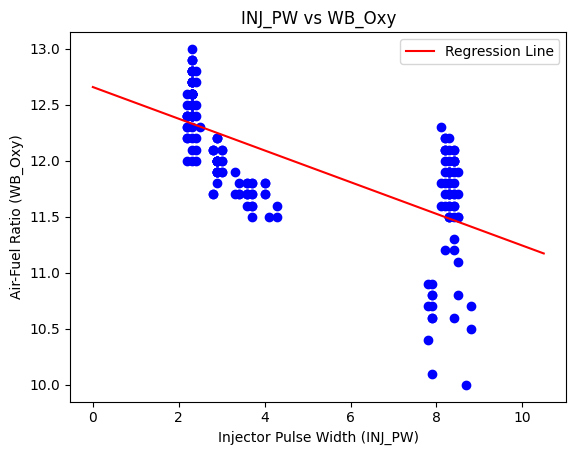

In [17]:

# Generate a range of INJ_PW values
x_vals = np.linspace(0.0, 10.5, 100)

# Use the regression line to estimate the WB_Oxy values
y_vals = x_vals * coef + intercept

# Plot the INJ_PW vs WB_Oxy data
plt.scatter(df["INJ_PW"], df["WB_Oxy"], color='blue')

# Plot the regression line
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('Injector Pulse Width (INJ_PW)')
plt.ylabel('Air-Fuel Ratio (WB_Oxy)')
plt.title('INJ_PW vs WB_Oxy')
plt.legend()

# Show the plot
plt.show()
